## Natural Language Project - SVM

## A. Input Data

#### In this step we will import the data set with name news-data.csv with the number of rows is 32602 news

In [1]:
# import library
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 

news_data = pd.read_csv("./news-data.csv") # read data
del news_data['Unnamed: 0'] # delete number of news rows
print (len(news_data)) # count news
news_data.head() 
news_data.count() #count based on attribute

32602


content     32602
url         32602
label       32602
time        32602
urllabel    32602
category    32602
dtype: int64

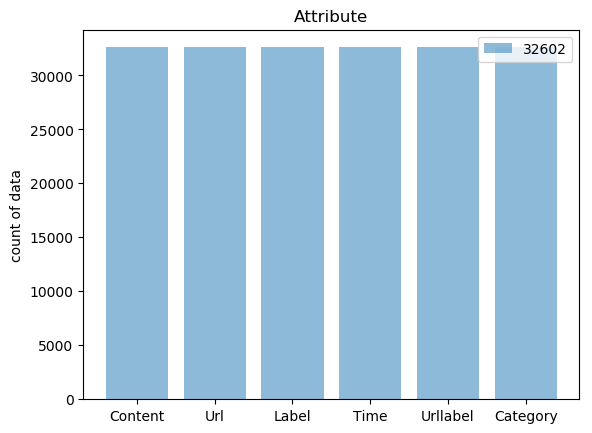

In [21]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Content', 'Url', 'Label', 'Time', 'Urllabel', 'Category')
y_pos = np.arange(len(objects))
performance = [len(news_data.content),len(news_data.url),len(news_data.label),len(news_data.time),len(news_data.urllabel),len(news_data.category)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('count of data')
plt.title('Attribute')
plt.legend(performance)
 
plt.show()

#### Print data-news.csv and we will see the sample of data

In [3]:
news_data # print data

,content,url,label,time,urllabel,category
0,court agrees to expedite n.f.l.'s appeal the d...,http://feeds1.nytimes.com/~r/nyt/rss/sports/~3...,0,5/4/2011 7:39,nyt,sport
1,no tsunami but fifa's corruption storm rages o...,http://feeds.reuters.com/~r/reuters/sportsnews...,0,6/7/2011 17:54,reuters,sport
2,chung backs bin hammam in fifa presidential ra...,http://feeds.reuters.com/~r/reuters/sportsnews...,0,4/5/2011 20:44,reuters,sport
3,rory mcilroy hangs on to slim lead at augusta ...,http://feeds.reuters.com/~r/reuters/sportsnews...,0,4/10/2011 1:26,reuters,sport
4,bartoli beats ivanovic to reach last four at i...,http://feeds.reuters.com/~r/reuters/sportsnews...,0,3/17/2011 0:11,reuters,sport
5,wozniacki reaches semis after azarenka injury ...,http://feeds.reuters.com/~r/reuters/sportsnews...,0,3/17/2011 23:16,reuters,sport
6,wozniacki and sharapova to meet in semis top s...,http://feeds.reuters.com/~r/reuters/sportsnews...,0,3/18/2011 2:27,reuters,sport
7,"rays 6, yankees 5: amid tension, yanks' slump ...",http://feeds1.nytimes.com/~r/nyt/rss/sports/~3...,0,5/17/2011 22:18,nyt,sport
8,roundup: durant and westbrook lead thunder to ...,http://feeds1.nytimes.com/~r/nyt/rss/sports/~3...,0,4/21/2011 6:30,nyt,sport
9,sports briefing | tennis: french open singles ...,http://feeds1.nytimes.com/~r/nyt/rss/sports/~3...,0,4/21/2011 8:10,nyt,sport


## B. Learning and Classification

In [4]:
# get Vector Count
count_vect = CountVectorizer(stop_words=stopwords.words('english'))
X_train_counts = count_vect.fit_transform(news_data.content)

# save word vector
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

# transform word vector to tfidf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# save tfidf
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

## 1. Support Vector Machine

In [6]:
# import library for algorithm
from sklearn import svm
from sklearn.model_selection import train_test_split
clf_svm = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, news_data.label, test_size=0.25, random_state=42) # use 0.50% of data for test
clf_svm.fit(X_train_tfidf, news_data.label)

# save model
pickle.dump(clf_svm, open("svm_model.pkl", "wb"))

In [7]:
len(y_train)

24451

In [8]:
len(y_test)

8151

In [9]:
# import library

import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "Japan build a biggest robots" # input news title for classification 
docs_new = [docs_new]

# load model
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svm_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print("Category :",category_list[predicted[0]], "news") # print the category based on input

Category : business news


In [22]:
# import library
import pandas
predicted = clf_svm.predict(X_test)
result_svm = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted}) # compare the actual category and prediction category
result_svm.to_csv('result_svm.csv', sep = ',') # save the result to the file csv
# for predicted_item, result in zip(predicted, y_test):
    # print(category_list[predicted_item], ' - ', category_list[result]) # print the result

In [11]:
# import library
from sklearn.metrics import confusion_matrix  

confusion_mat = confusion_matrix(y_test,predicted) # confusion matrix based on actual and predicted
print(confusion_mat)                                              

[[2028    1    4    0    0    0    1]
 [   0 1548    4   19    2    2    1]
 [   1    7 1156   25    8    5    5]
 [   1    6   13 1227    4    6   40]
 [   0    4   15    1  437    3    2]
 [   0    0    0    1    0  854    4]
 [   1    3    1   15    6    3  687]]


In [12]:
# import library
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf_svm.predict(X_test)

print(classification_report(y_test, y_pred)) # print the metrics
print('Accuracy : ', accuracy_score(y_test, y_pred) * 100) # print the accuracy

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2034
          1       0.99      0.98      0.98      1576
          2       0.97      0.96      0.96      1207
          3       0.95      0.95      0.95      1297
          4       0.96      0.95      0.95       462
          5       0.98      0.99      0.99       859
          6       0.93      0.96      0.94       716

avg / total       0.97      0.97      0.97      8151

Accuracy :  97.3745552692921


In [13]:
# import library
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_svm, X_train_tfidf, news_data.label, cv=10) # use library
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2))

Cross Validation Accuracy: 85.81 (+/- 0.02)


## 2. Naive Bayes

In [14]:
# import library for algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, news_data.label, test_size=0.25, random_state=42) # use 0.25% of data for test
clf_nb = MultinomialNB().fit(X_train, y_train)

# save model
pickle.dump(clf_nb, open("nb_model.pkl", "wb"))

In [15]:
# import library
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "Messi joins other football team" # input news title for classification 
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print("Category :", category_list[predicted[0]], "news") # print the category based on input

Category : sport news


In [23]:
predicted = loaded_model.predict(X_test)
result_bayes = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': predicted}) # compare the actual category and prediction category
result_bayes.to_csv('result_bayes.csv', sep = ',')  # save the result to the file csv

# for predicted_item, result in zip(predicted, y_test):
   # print(category_list[predicted_item], ' - ', category_list[result]) # print the result

In [17]:
# import library
from sklearn.metrics import confusion_matrix  

confusion_mat = confusion_matrix(y_test,predicted) # confusion matrix based on actual and predicted
print(confusion_mat)

[[2002   10   12    9    0    1    0]
 [  15 1467   26   59    0    9    0]
 [  69  126  874  118    1   10    9]
 [  41   31   45 1131    1   15   33]
 [  65   52   65   77  192    7    4]
 [ 183   31   27   23    0  589    6]
 [  77   61   50  255    8    9  256]]


In [18]:
# import library
from sklearn.metrics import classification_report, accuracy_score
y_pred_nb = loaded_model.predict(X_test)

print(classification_report(y_test, y_pred_nb)) # print the metrics
print('Accuracy : ', accuracy_score(y_test, y_pred_nb) * 100) # print the accuracy

             precision    recall  f1-score   support

          0       0.82      0.98      0.89      2034
          1       0.83      0.93      0.87      1576
          2       0.80      0.72      0.76      1207
          3       0.68      0.87      0.76      1297
          4       0.95      0.42      0.58       462
          5       0.92      0.69      0.79       859
          6       0.83      0.36      0.50       716

avg / total       0.81      0.80      0.78      8151

Accuracy :  79.87976935345357


In [19]:
# import library
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_nb, X_train_tfidf, news_data.label, cv=10) # use library
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2))

Cross Validation Accuracy: 80.66 (+/- 0.01)
